# Music and Mental Health (MxMH) 🎧 🎶 🧠

This exploratory data analysis project was completed loosely following guidelines from the [Data Analysis with Python: Zero to Pandas Course Project](https://jovian.ai/aakashns/zerotopandas-course-project-starter) notebook on Jovian.

Dataset is from [Music & Mental Health Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results) on Kaggle, which reports results on preference of different music genres and self-reported mental health conditions (anxiety, depression, insomnia and obsessive-compulsive disorder).

Due to personal interest on music therapy, I was curious to see if there were any potential correlations between music preference and self-reported mental health conditions. However, due to the survey being self-reported, especially in terms of the mental health conditions, this might not be an accurate observation as we are not sure whether the respondents have actually been officially diagnosed with those mental health conditions. Besides that, the usage of a numeric rating scale (from 0-10) for self-reported mental health conditions has certain limitations, e.g. respondents might differ in subjective views on severity despite providing similar ratings. Regardless, this dataset was able to provide preliminary insights towards how one's mental health might be affected by/affecting one's preference in music, opening possibilities to deep dive into this topic and inform future approaches in music therapy.

*As the practical objective of completing this project was to learn how to use `pandas` and `matplotlib` through hands-on experience, I appreciate any feedback and suggestions towards improving the exploratory data analysis of the dataset.*

### Downloading the MxMH dataset 

Install `opendatasets` first if haven't already (on command line)

```
pip install opendatasets
```

In [2]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results"

od.download(dataset_url)

Skipping, found downloaded files in "./mxmh-survey-results" (use force=True to force download)


### Data Preparation and Cleaning

#### Load the dataset into a data frame using `pandas`

In [1]:
import pandas as pd

mxmh_raw_df = pd.read_csv("../eda-music-mental-health/mxmh-survey-results/mxmh_survey_results.csv")

mxmh_raw_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


#### Explore the number of rows & columns, ranges of values etc.

In [42]:
mxmh_raw_df.shape

(736, 33)

The MxMH dataset has 736 rows and 33 columns.

In [72]:
mxmh_raw_df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


#### Handle missing, incorrect and invalid data

Dropping columns that are not needed for current analysis:

In [2]:
mxmh_df = mxmh_raw_df.drop(['Timestamp', 'Primary streaming service', 'While working', 'Exploratory', 'Foreign languages', 'Permissions'], axis = 1, inplace = False)

mxmh_df.head()

,Age,Hours per day,Instrumentalist,Composer,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Yes,Latin,156.0,Rarely,Never,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,No,No,Rock,119.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,No,No,Video game music,132.0,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,No,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,No,No,R&B,107.0,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [61]:
mxmh_df.isnull().sum()

Age                               1
Hours per day                     0
Instrumentalist                   4
Composer                          1
Fav genre                         0
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                        0
Insomnia                          0
OCD                               0
Music effects                     8
dtype: int64

From the list above, we see that "BPM" variable has 107 missing entries (14.54%). This optional question might be trickier for some respondents (asking about beats per minute of favourite genre) which caused them to skip it.

In [62]:
mxmh_df['BPM'].unique()

array([1.56000000e+02, 1.19000000e+02, 1.32000000e+02, 8.40000000e+01,
       1.07000000e+02, 8.60000000e+01, 6.60000000e+01, 9.50000000e+01,
       9.40000000e+01, 1.55000000e+02,            nan, 1.25000000e+02,
       8.80000000e+01, 1.48000000e+02, 1.03000000e+02, 1.20000000e+02,
       9.90000000e+01, 1.18000000e+02, 7.90000000e+01, 1.69000000e+02,
       1.36000000e+02, 1.01000000e+02, 1.26000000e+02, 1.83000000e+02,
       1.42000000e+02, 7.50000000e+01, 8.90000000e+01, 1.40000000e+02,
       1.61000000e+02, 8.00000000e+01, 1.30000000e+02, 1.47000000e+02,
       7.70000000e+01, 1.15000000e+02, 1.57000000e+02, 9.00000000e+01,
       1.28000000e+02, 9.60000000e+01, 9.10000000e+01, 5.50000000e+01,
       8.50000000e+01, 1.60000000e+02, 1.08000000e+02, 1.70000000e+02,
       1.74000000e+02, 1.27000000e+02, 1.65000000e+02, 1.13000000e+02,
       1.67000000e+02, 1.10000000e+02, 1.50000000e+02, 9.30000000e+01,
       1.09000000e+02, 1.75000000e+02, 1.62000000e+02, 1.89000000e+02,
      

From the unique BPM values above, we see that there are also some unusual responses/outliers (e.g. 0.00000000e+00, 9.99999999e+08). Hence, we will impute null values with the median value rather than mean. [Reference](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

In [3]:
BPM_median = mxmh_df['BPM'].median()

mxmh_df['BPM'].fillna(BPM_median, inplace = True)

We will also exclude responses lower than 40 BPM and higher than 220 BPM (based on range of tempo of songs on [getsongbpm.com](https://getsongbpm.com/tempo)).

In [4]:
mxmh_df = mxmh_df.loc[(mxmh_df.BPM >= 40) & (mxmh_df.BPM <= 220)]

Removing remaining rows with missing values as they are ~1%:

In [5]:
mxmh_df.dropna(inplace = True)

### Exploratory Analysis and Visualisation

In [13]:
import matplotlib.pyplot as plt

View cleaned dataframe

In [6]:
mxmh_df.head()

,Age,Hours per day,Instrumentalist,Composer,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4.0,No,No,Video game music,132.0,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,No,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,No,No,R&B,107.0,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,5.0,Yes,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,3.0,Yes,No,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


#### Compute the mean, sum, range and other interesting statistics for numeric columns

In [17]:
mean_age = mxmh_df['Age'].mean()
print(f"The average age of respondents is {mean_age:.2f}.")

mean_hours = mxmh_df['Hours per day'].mean()
print(f"The average duration that respondents listen to music each day is {mean_hours:.2f} hours.")

mean_bpm = mxmh_df['BPM'].mean()
print(f"The average BPM of songs listened by respondents is {mean_bpm:.2f}.")

mean_anxiety = mxmh_df['Anxiety'].mean()
print(f"The average self-reported anxiety score of respondents is {mean_anxiety:.2f}.")

mean_depression = mxmh_df['Depression'].mean()
print(f"The average self-reported depression score of respondents is {mean_depression:.2f}.")

mean_insomnia = mxmh_df['Insomnia'].mean()
print(f"The average self-reported insomnia score of respondents is {mean_insomnia:.2f}.")

mean_ocd = mxmh_df['OCD'].mean()
print(f"The average self-reported OCD score of respondents is {mean_ocd:.2f}.")

The average age of respondents is 25.06.
The average duration that respondents listen to music each day is 3.59 hours.
The average BPM of songs listened by respondents is 123.33.
The average self-reported anxiety score of respondents is 5.83.
The average self-reported depression score of respondents is 4.78.
The average self-reported insomnia score of respondents is 3.74.
The average self-reported OCD score of respondents is 2.64.


In [7]:
mxmh_df.groupby(['Instrumentalist'])['Instrumentalist'].count()

Instrumentalist
No     486
Yes    230
Name: Instrumentalist, dtype: int64

230 respondents (32.12%) play musical instruments regularly.

In [38]:
mxmh_df.groupby(['Composer'])['Composer'].count()

Composer
No     593
Yes    123
Name: Composer, dtype: int64

123 respondents (17.18%) have experience with music composition.

Text(0.5, 1.0, 'Favourite music genres of respondents')

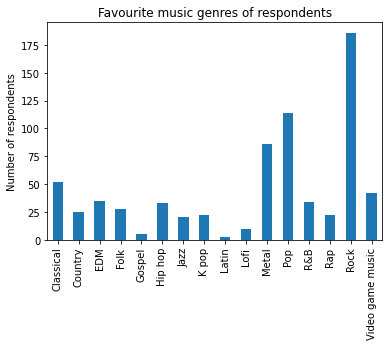

In [15]:
music_genres = mxmh_df.groupby(['Fav genre'])['Fav genre'].count()

music_genres.plot.bar()
plt.xlabel("")
plt.ylabel("Number of respondents")
plt.title("Favourite music genres of respondents")

Rock is the most popular music genre among respondents, whereas Latin is the least popular music genre.

In [40]:
mxmh_df.groupby(['Music effects'])['Music effects'].count()

Music effects
Improve      533
No effect    166
Worsen        17
Name: Music effects, dtype: int64

Majority of respondents (74.44%) believe that music is able to improve their mental health conditions.

#### Explore distributions of numeric columns using histograms etc.

Install `matplotlib` first if haven't already (on command line)

```
pip install matplotlib

```

Text(0.5, 1.0, 'Number of hours respondents listen to music daily')

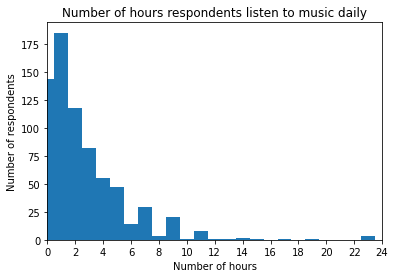

In [104]:
mxmh_df['Hours per day'].value_counts(bins = 24).sort_index().plot.bar(width = 1)
plt.xlim(xmin = 0)
plt.xlabel("Number of hours")
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], rotation = "horizontal")
plt.ylabel("Number of respondents")
plt.title("Number of hours respondents listen to music daily")

Text(0.5, 0.98, 'How frequently respondents listen to different music genres')

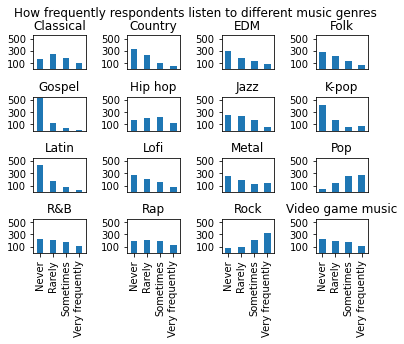

In [11]:
frequency = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

plt.subplot(4,4,1)
mxmh_df['Frequency [Classical]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Classical")

plt.subplot(4,4,2)
mxmh_df['Frequency [Country]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Country")

plt.subplot(4,4,3)
mxmh_df['Frequency [EDM]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("EDM")

plt.subplot(4,4,4)
mxmh_df['Frequency [Folk]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Folk")

plt.subplot(4,4,5)
mxmh_df['Frequency [Gospel]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Gospel")

plt.subplot(4,4,6)
mxmh_df['Frequency [Hip hop]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Hip hop")

plt.subplot(4,4,7)
mxmh_df['Frequency [Jazz]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Jazz")

plt.subplot(4,4,8)
mxmh_df['Frequency [K pop]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("K-pop")

plt.subplot(4,4,9)
mxmh_df['Frequency [Latin]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Latin")

plt.subplot(4,4,10)
mxmh_df['Frequency [Lofi]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Lofi")

plt.subplot(4,4,11)
mxmh_df['Frequency [Metal]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Metal")

plt.subplot(4,4,12)
mxmh_df['Frequency [Pop]'].value_counts().loc[frequency].plot.bar()
plt.xticks([])
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Pop")

plt.subplot(4,4,13)
mxmh_df['Frequency [R&B]'].value_counts().loc[frequency].plot.bar()
plt.xticks(rotation = 'vertical')
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("R&B")

plt.subplot(4,4,14)
mxmh_df['Frequency [Rap]'].value_counts().loc[frequency].plot.bar()
plt.xticks(rotation = 'vertical')
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Rap")

plt.subplot(4,4,15)
mxmh_df['Frequency [Rock]'].value_counts().loc[frequency].plot.bar()
plt.xticks(rotation = 'vertical')
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Rock")

plt.subplot(4,4,16)
mxmh_df['Frequency [Video game music]'].value_counts().loc[frequency].plot.bar()
plt.xticks(rotation = 'vertical')
plt.yticks([100,300,500])
plt.ylim(0,550)
plt.title("Video game music")

plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
plt.suptitle("How frequently respondents listen to different music genres")

Text(0.5, 0.98, 'Self-reported mental health condition scores')

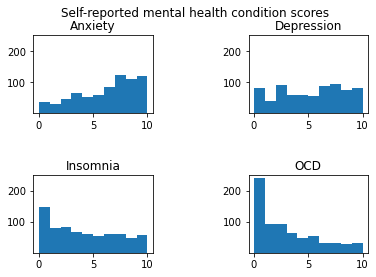

In [110]:
plt.subplot(2,2,1)
plt.hist(mxmh_df['Anxiety'])
plt.yticks([100,200])
plt.ylim(0,250)
plt.title("Anxiety")

plt.subplot(2,2,2)
plt.hist(mxmh_df['Depression'])
plt.yticks([100,200])
plt.ylim(0,250)
plt.title("Depression")

plt.subplot(2,2,3)
plt.hist(mxmh_df['Insomnia'])
plt.yticks([100,200])
plt.ylim(0,250)
plt.title("Insomnia")

plt.subplot(2,2,4)
plt.hist(mxmh_df['OCD'])
plt.yticks([100,200])
plt.ylim(0,250)
plt.title("OCD")

plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
plt.suptitle("Self-reported mental health condition scores")

#### Explore relationship between columns using scatter plots, bar charts etc.

What types of music genre preferences are potentially correlated to self-reported mental health conditions?

*Anxiety*

<AxesSubplot:xlabel='Fav genre'>

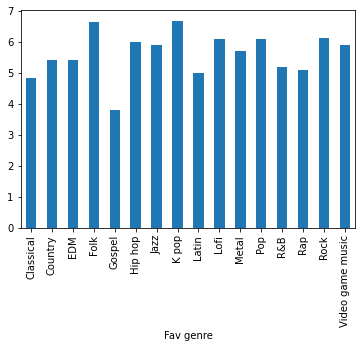

In [21]:
anxiety_music =  mxmh_df.groupby(['Fav genre'])['Anxiety'].mean()

anxiety_music.plot.bar()

Respondents with Gospel as their favourite music genre seem to have lower self-reported anxiety on average, whereas those with Folk and K-Pop as their favourite music genre seem to have relatively higher self-reported anxiety.

*Note: The number of respondents are largely unbalanced, with very low number of respondents reporting Gospel as their favourite genre, for example. Hence, the following and subsequent observations are just a rough indication of potential patterns of the data.*

*Depression*

<AxesSubplot:xlabel='Fav genre'>

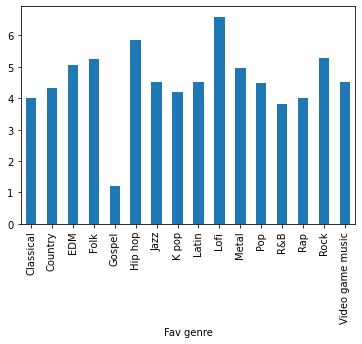

In [22]:
depression_music =  mxmh_df.groupby(['Fav genre'])['Depression'].mean()

depression_music.plot.bar()

Respondents with Gospel as their favourite music genre seem to have the lowest self-reported depression on average, whereas those with Lofi as their favourite music genre seem to have the highest self-reported depression.

*Insomnia*

<AxesSubplot:xlabel='Fav genre'>

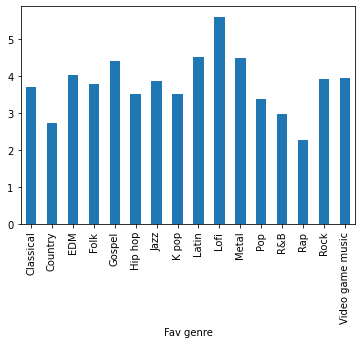

In [23]:
insomnia_music =  mxmh_df.groupby(['Fav genre'])['Insomnia'].mean()

insomnia_music.plot.bar()

Respondents with Rap as their favourite music genre seem to have lower self-reported insomnia on average, whereas those with Lofi as their favourite music genre seem to have the highest self-reported insomnia.

*OCD*

<AxesSubplot:xlabel='Fav genre'>

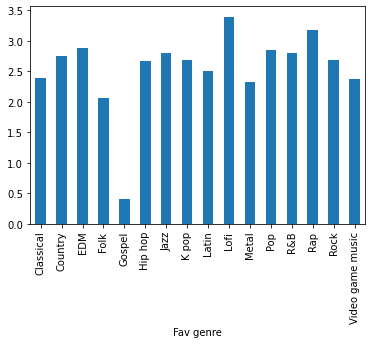

In [26]:
ocd_music =  mxmh_df.groupby(['Fav genre'])['OCD'].mean()

ocd_music.plot.bar()

Respondents with Gospel as their favourite music genre seem to have lower self-reported OCD on average, whereas those with Lofi as their favourite music genre seem to have relatively higher self-reported OCD.

From the observations above, it could be possible that respondents with higher self-reported depression, insomnia and OCD prefer Lofi music due to its potential calming effects. However, this is not conclusive and will require further data collection and analysis to explore this situation.